# Énoncé du problème
Nous disposons d'un ensemble de données propre généré à partir d'un IDS, également étiqueté « 0 » pour No-Attack et « 1 » pour Attack.

Dans cet ensemble de données, nous passerons par différents prétraitements bien connus pour 

Les données sont propres, mais nous devons nous assurer que chaque fonctionnalité est importante pour le modèle via « l'importance des fonctionnalités » qui accompagne le modèle généré

In [1]:
#importer les bibliothéque nécessaire
import math, time, random, datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
import seaborn as sns
import missingno
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, auc
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve

In [2]:
# Afficher tous les colonnes
pd.options.display.max_columns=70

In [3]:
train = pd.read_csv('C:/document/MSDSI_2022_2023/S2/DS/Projet/archive2/UNSW_NB15_training-set.csv')
test = pd.read_csv('C:/document/MSDSI_2022_2023/S2/DS/Projet/archive2/UNSW_NB15_testing-set.csv')
test.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,0,0,24.295600,8.375000,30.177547,11.830604,255,621772692,2202533631,255,0.000000,0.000000,0.000000,43,43,0,0,1,0,1,1,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,2,17,49.915000,15.432865,61.426934,1387.778330,255,1417884146,3077387971,255,0.000000,0.000000,0.000000,52,1106,0,0,43,1,1,1,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,1,6,231.875571,102.737203,17179.586860,11420.926230,255,2116150707,2963114973,255,0.111897,0.061458,0.050439,46,824,0,0,7,1,2,1,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,1,3,152.876547,90.235726,259.080172,4991.784669,255,1107119177,1047442890,255,0.000000,0.000000,0.000000,52,64,0,0,1,1,2,1,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,2,1,47.750333,75.659602,2415.837634,115.807000,255,2436137549,1977154190,255,0.128381,0.071147,0.057234,53,45,0,0,43,1,2,2,1,40,0,0,0,2,39,0,Normal,0


In [4]:
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0


In [5]:
#nous concaténerons à la fois l'ensemble d'entraînement et l'ensemble de test pour éviter de faire le prétraitement deux fois.
data = pd.concat([train,test]).reset_index(drop=True)
cols_cat = data.select_dtypes('object').columns #  (for one hot encoder)
cols_numeric = data._get_numeric_data().columns # for scaling

In [6]:
#afficher le dataSet
data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0


# EDA

In [7]:
#afficher la taille du DataSet
data.shape

(257673, 45)

In [8]:
#afficher toutes les colonnes du dataset
data.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [9]:
#afficher les information du dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

In [10]:
#afficher la description du DataSet
data.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,257673.000000,257673.000000,2.576730e+05,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,257673.000000,257673.000000,2.576730e+05,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000
mean,72811.823858,1.246715,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,180.000931,84.754957,7.060869e+07,6.582143e+05,4.889317,6.743691,912.300834,98.915462,5.419373e+03,582.251456,121.753661,1.006120e+09,1.002295e+09,119.254629,0.046038,0.023652,0.022386,137.639027,121.649703,0.102242,1.968900e+03,9.383176,1.324978,6.050467,5.238271,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,0.639077
std,48929.917641,5.974305,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,102.488268,112.762131,1.857313e+08,2.412372e+06,65.574953,53.702222,6922.153239,1094.048691,4.903450e+04,3930.153369,127.367443,1.367795e+09,1.363877e+09,127.230477,0.092908,0.053856,0.045771,205.901118,254.041013,0.710593,4.962523e+04,10.829706,0.992300,8.173749,8.160822,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,0.480269
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,32210.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,62.000000,0.000000,1.231800e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,64419.000000,0.004285,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,254.000000,29.000000,7.439423e+05,1.747441e+03,0.000000,0.000000,0.381696,0.007000,6.736370e-01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,73.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,110923.000000,0.685777,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,254.000000,252.000000,8.000000e+07,2.210538e+04,3.000000,2.000000,58.094727,56.438859,2.787367e+03,119.712937,255.000000,2.007375e+09,1.992752e+09,255.000000,0.082082,0.036842,0.044665,100.000000,89.000000,0.000000,0.000000e+00,12.000000,2.000000,6.000000,4.000000,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,1.000000
max,175341.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,2.242273e+07,5319.000000,5507.000000,84371.496000,57739.240000,1.483831e+06,463199.240100,255.000000,4.294959e+09,4.294882e+09,255.000000,3.821465,3.226788,2.928778,1504.000000,1500.000000,172.000000,6.558056e+06,63.000000,6.000000,59.000000,59.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [11]:
#afficher la description des données categorielles 
data.describe(include=['object', 'bool', 'character'])

,proto,service,state,attack_cat
count,257673,257673,257673,257673
unique,133,13,11,10
top,tcp,-,FIN,Normal
freq,123041,141321,117164,93000


In [12]:
#compter le nombre d'attack et non attack dans notre dataset 
data['label'].value_counts()

1    164673
0     93000
Name: label, dtype: int64

In [13]:
data['label'].value_counts(normalize=True)

1    0.639077
0    0.360923
Name: label, dtype: float64

<AxesSubplot:>

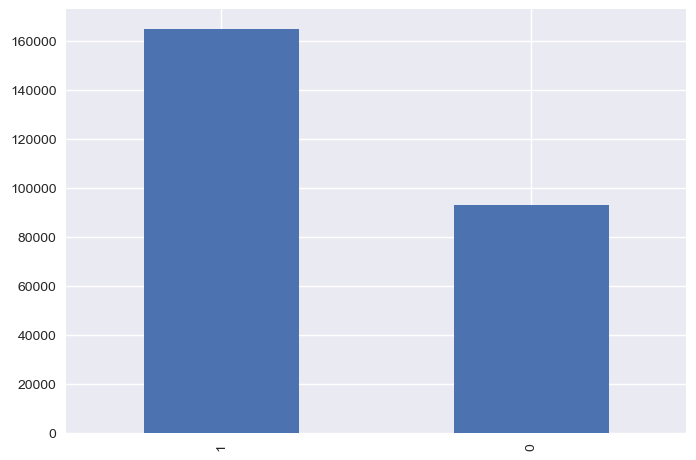

In [14]:
data['label'].value_counts().plot.bar()

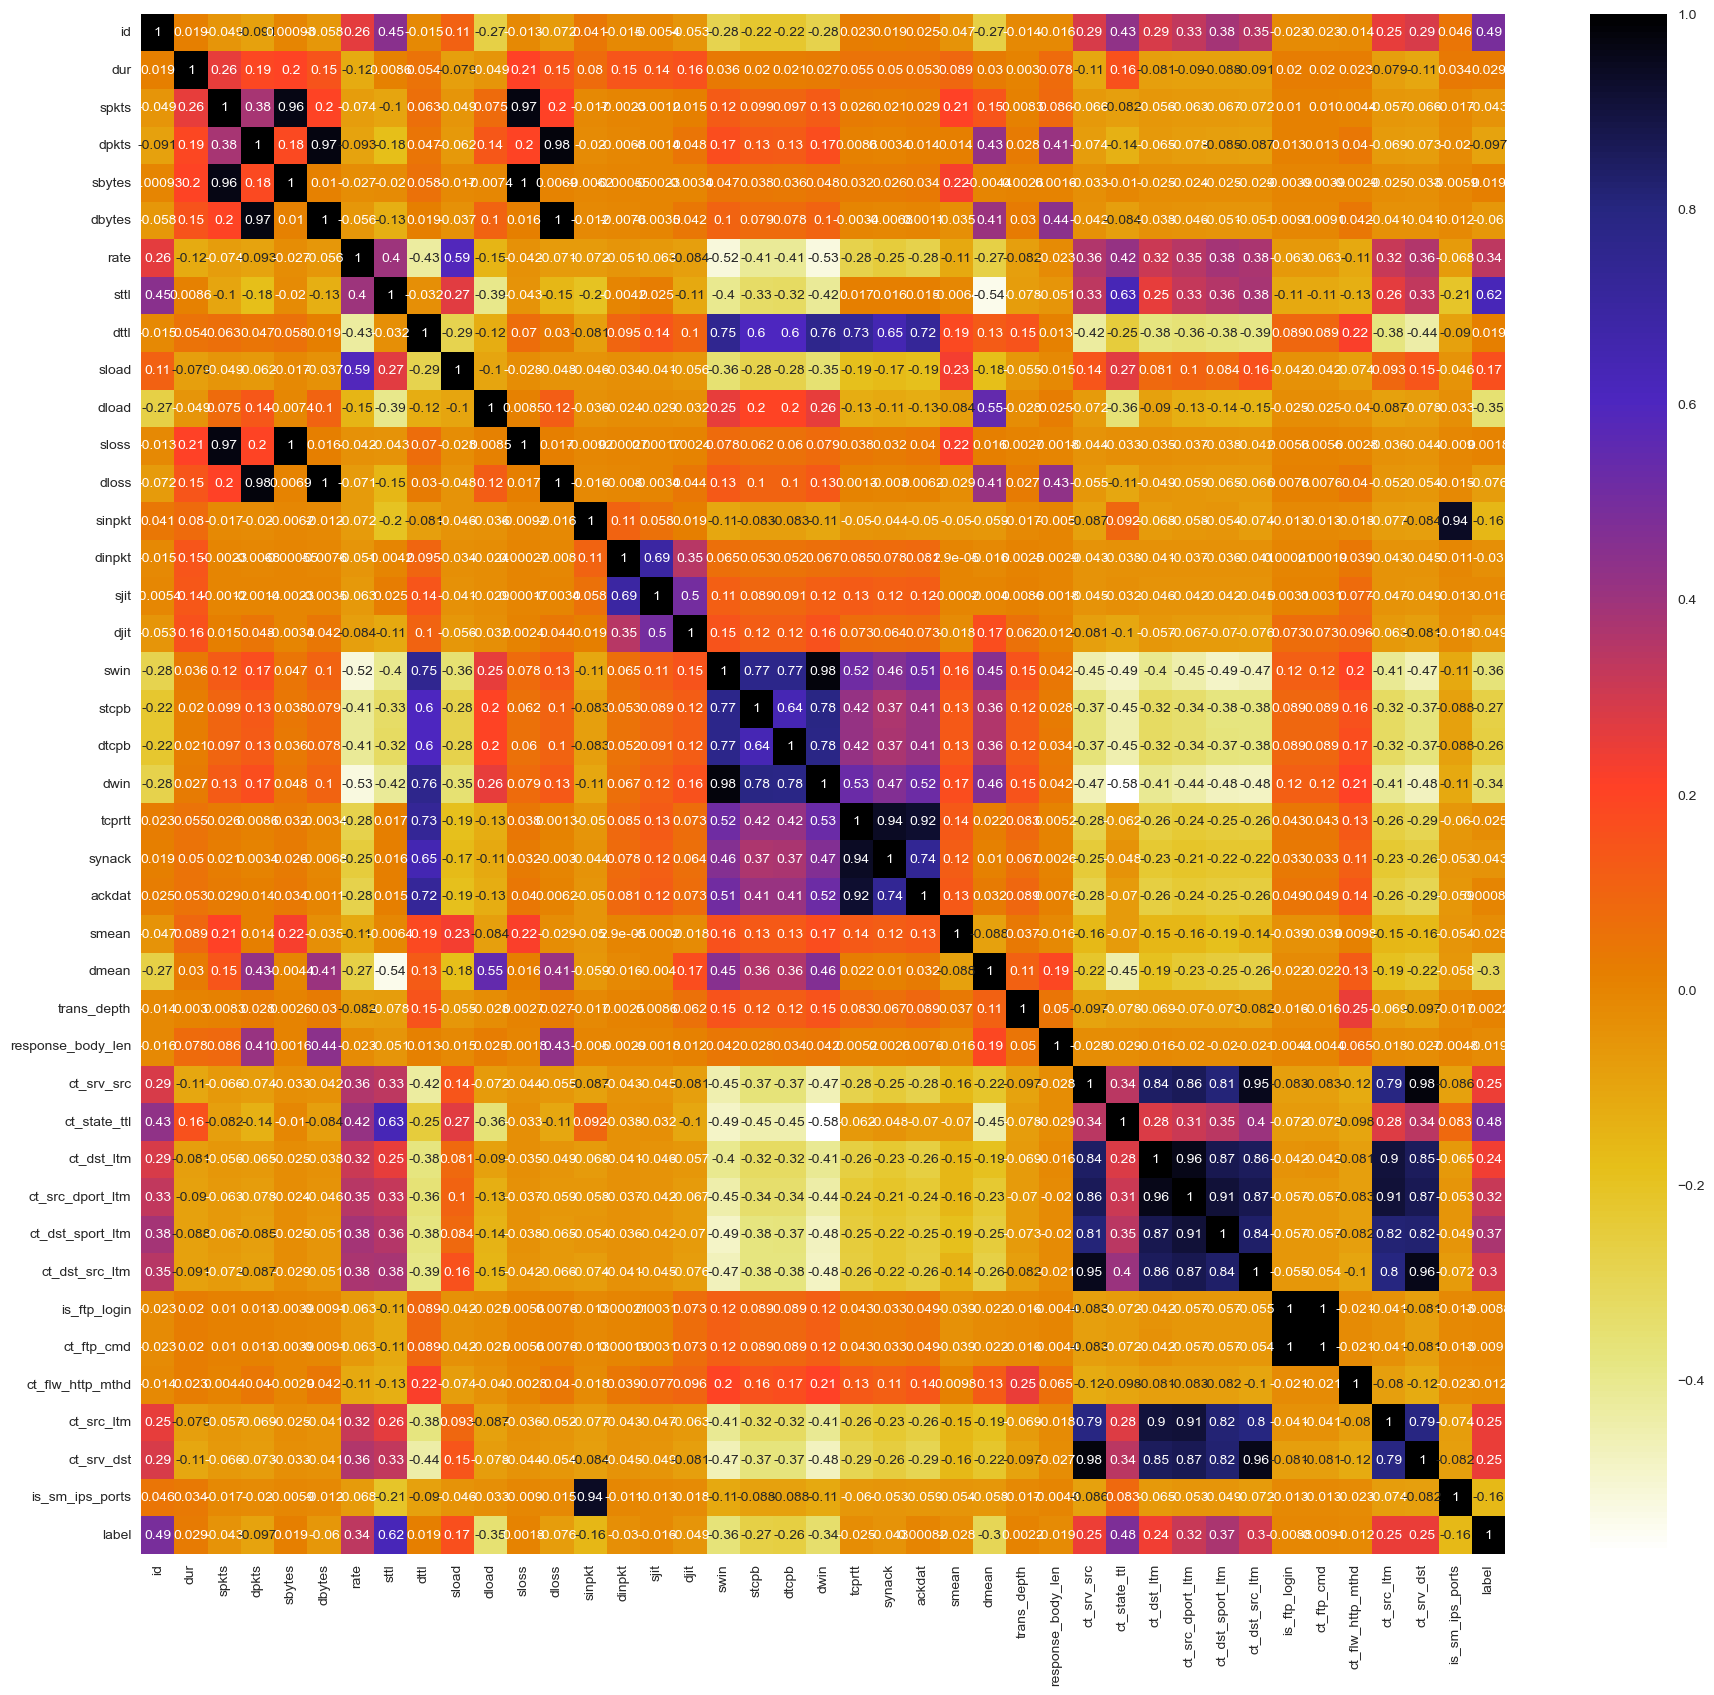

In [15]:
#Matrice de correlation
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(22,20))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

# II- Data Pre-processing &  Preparation

In [16]:
#No missing values
print(data.isnull().sum())

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

<AxesSubplot:>

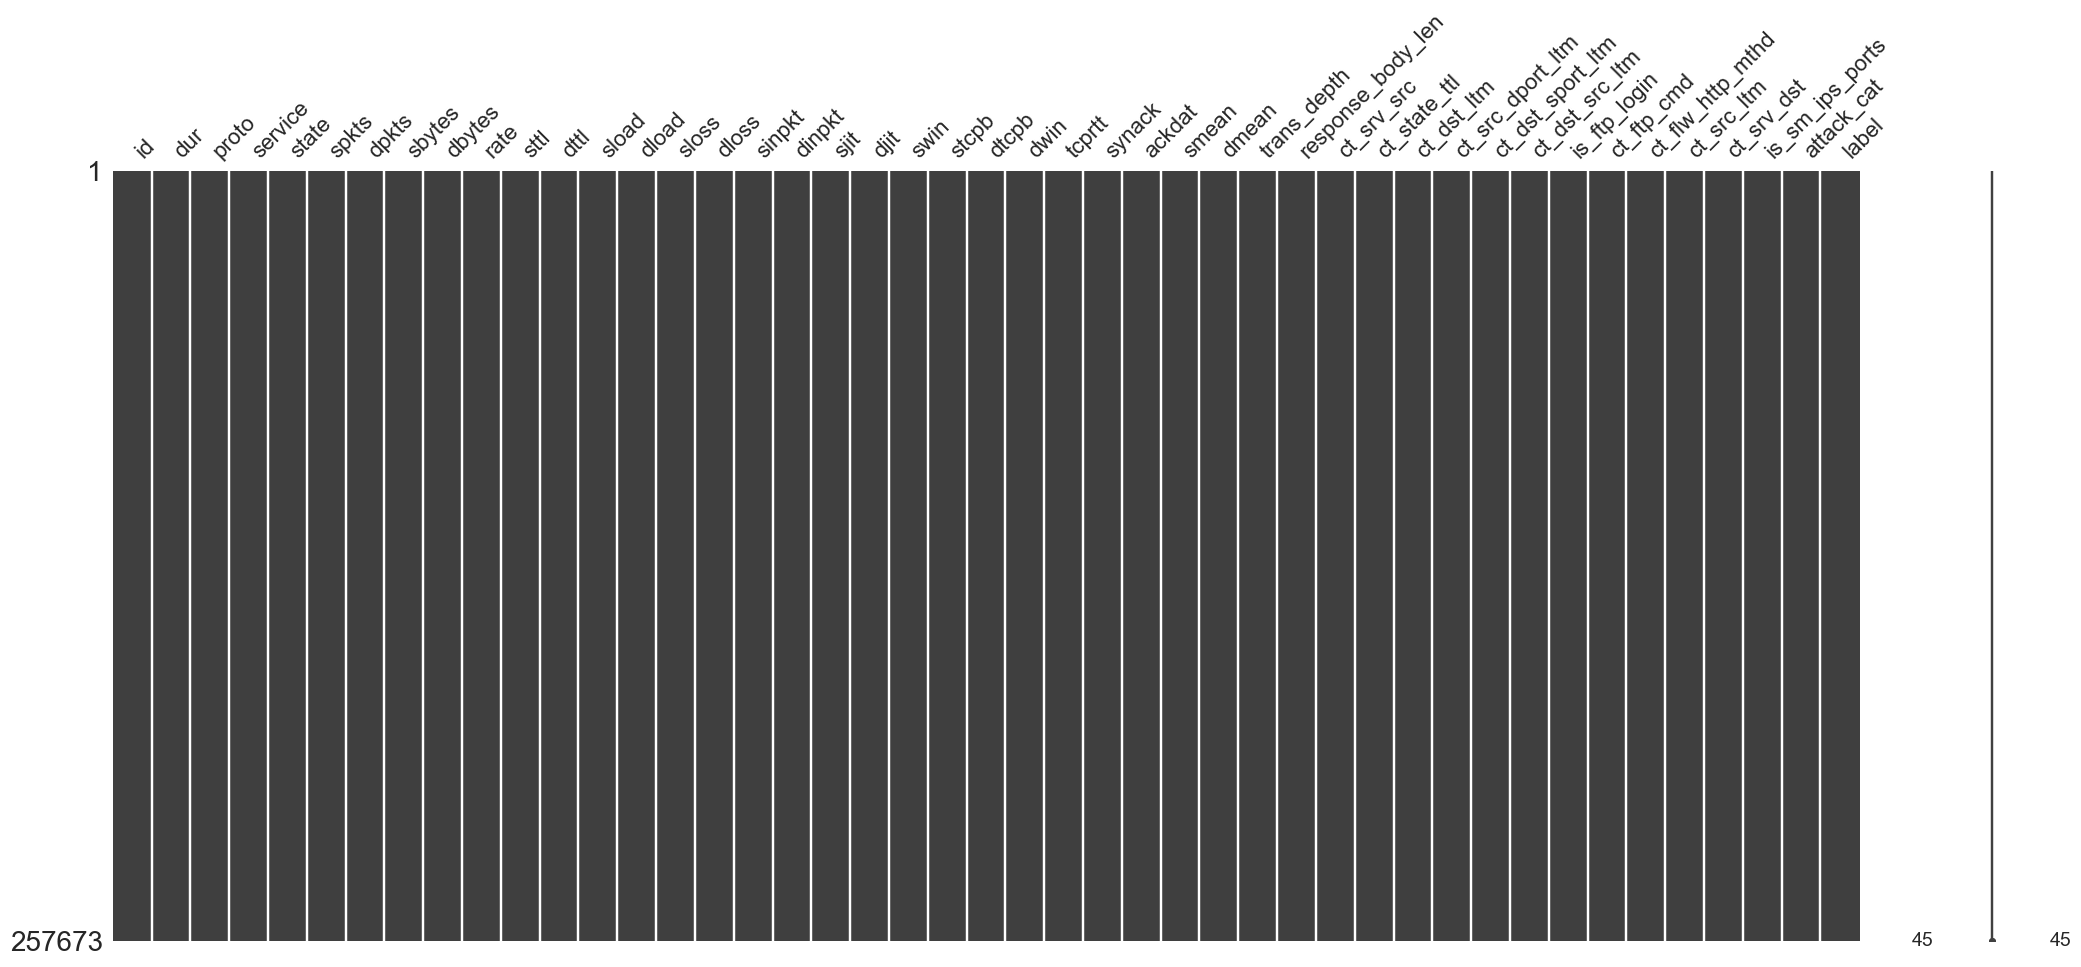

In [17]:
missingno.matrix(data)

In [18]:
#Vérifier la duplication
print(data.duplicated().sum()) 

0


In [19]:
# Fonction qui permet de remplacer '-' par 'None'
def Remove_dump_values(data, cols):
    for col in cols:
        # Replace '-' with 'None' in the specified column
        data[col] = np.where(data[col] == '-', 'None', data[col])
    return data  # Return the modified DataFrame


In [20]:
cols = data.columns
data_bin = Remove_dump_values(data, cols)


In [21]:
#Affichage du nouveau data
data_bin.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,1.1e-05,udp,None,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,8e-06,udp,None,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,5e-06,udp,None,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,6e-06,udp,None,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,1e-05,udp,None,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.01,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0


In [22]:
#Remove Unnecessary features
data_bin = data_bin.drop(['id'], axis=1) 
data_bin.drop(['attack_cat'], axis=1, inplace=True)

### Traitement des données catégorielles

In [23]:
data_bin['proto'].unique()

array(['udp', 'arp', 'tcp', 'igmp', 'ospf', 'sctp', 'gre', 'ggp', 'ip',
       'ipnip', 'st2', 'argus', 'chaos', 'egp', 'emcon', 'nvp', 'pup',
       'xnet', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1', 'trunk-2',
       'xns-idp', 'leaf-1', 'leaf-2', 'irtp', 'rdp', 'netblt', 'mfe-nsp',
       'merit-inp', '3pc', 'idpr', 'ddp', 'idpr-cmtp', 'tp++', 'ipv6',
       'sdrp', 'ipv6-frag', 'ipv6-route', 'idrp', 'mhrp', 'i-nlsp', 'rvd',
       'mobile', 'narp', 'skip', 'tlsp', 'ipv6-no', 'any', 'ipv6-opts',
       'cftp', 'sat-expak', 'ippc', 'kryptolan', 'sat-mon', 'cpnx', 'wsn',
       'pvp', 'br-sat-mon', 'sun-nd', 'wb-mon', 'vmtp', 'ttp', 'vines',
       'nsfnet-igp', 'dgp', 'eigrp', 'tcf', 'sprite-rpc', 'larp', 'mtp',
       'ax.25', 'ipip', 'aes-sp3-d', 'micp', 'encap', 'pri-enc', 'gmtp',
       'ifmp', 'pnni', 'qnx', 'scps', 'cbt', 'bbn-rcc', 'igp', 'bna',
       'swipe', 'visa', 'ipcv', 'cphb', 'iso-tp4', 'wb-expak', 'sep',
       'secure-vmtp', 'xtp', 'il', 'rsvp', 'unas', 'fc', 'iso-ip',


In [24]:
data_bin['service'].unique()

array(['None', 'http', 'ftp', 'ftp-data', 'smtp', 'pop3', 'dns', 'snmp',
       'ssl', 'dhcp', 'irc', 'radius', 'ssh'], dtype=object)

In [25]:
data_bin['state'].unique()

array(['INT', 'FIN', 'REQ', 'ACC', 'CON', 'RST', 'CLO', 'ECO', 'PAR',
       'URN', 'no'], dtype=object)

In [26]:
#Labelencoder 
df_cat = data_bin.select_dtypes(exclude=[np.number])
print(df_cat.columns)
for feature in df_cat.columns:
    data_bin[feature] = LabelEncoder().fit_transform(data_bin[feature])

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')


In [27]:
data_bin

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,83332,119,0,5,131,0,6670,0,114233,3,0,30424,0,0,0,11,0,0,0,0,0,0,0,0,0,0,563,0,0,0,11,2,0,0,0,11,0,0,0,0,11,0,0
1,109721,119,0,5,131,0,1851,0,9541,3,0,114190,0,0,0,8,0,0,0,0,0,0,0,0,0,0,1247,0,0,0,11,2,0,0,0,11,0,0,0,0,11,0,0
2,108636,119,0,5,131,0,173,0,35966,3,0,112232,0,0,0,5,0,0,0,0,0,0,0,0,0,0,865,0,0,0,22,2,0,0,0,22,0,0,0,0,22,0,0
3,109079,119,0,5,131,0,8924,0,22717,3,0,89188,0,0,0,6,0,0,0,0,0,0,0,0,0,0,773,0,0,0,22,2,11,11,0,22,0,0,0,11,22,0,0
4,97686,119,0,5,131,0,2646,0,2984,3,0,111966,0,0,0,10,0,0,0,0,0,0,0,0,0,0,70,0,0,0,22,2,11,11,0,22,0,0,0,11,22,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257668,109944,119,2,5,131,0,371,0,5948,3,0,78591,0,0,0,9,0,0,0,0,0,0,0,0,0,0,904,0,0,0,16,2,16,16,4,16,0,0,0,16,16,0,1
257669,42803,113,0,4,1,572,7527,4421,69697,3,1,114297,77042,129,1,78893,87905,63221,18265,12,74729,72743,9,18710,12113,24598,959,748,0,0,0,1,0,0,0,11,0,0,0,0,0,0,1
257670,109944,119,2,5,131,0,371,0,5948,3,0,78591,0,0,0,9,0,0,0,0,0,0,0,0,0,0,904,0,0,0,3,2,22,22,21,4,0,0,0,22,3,0,1
257671,109944,119,2,5,131,0,371,0,5948,3,0,78591,0,0,0,9,0,0,0,0,0,0,0,0,0,0,904,0,0,0,23,2,23,23,5,23,0,0,0,23,23,0,1


In [28]:
data_bin.shape

(257673, 43)

## Data correlation

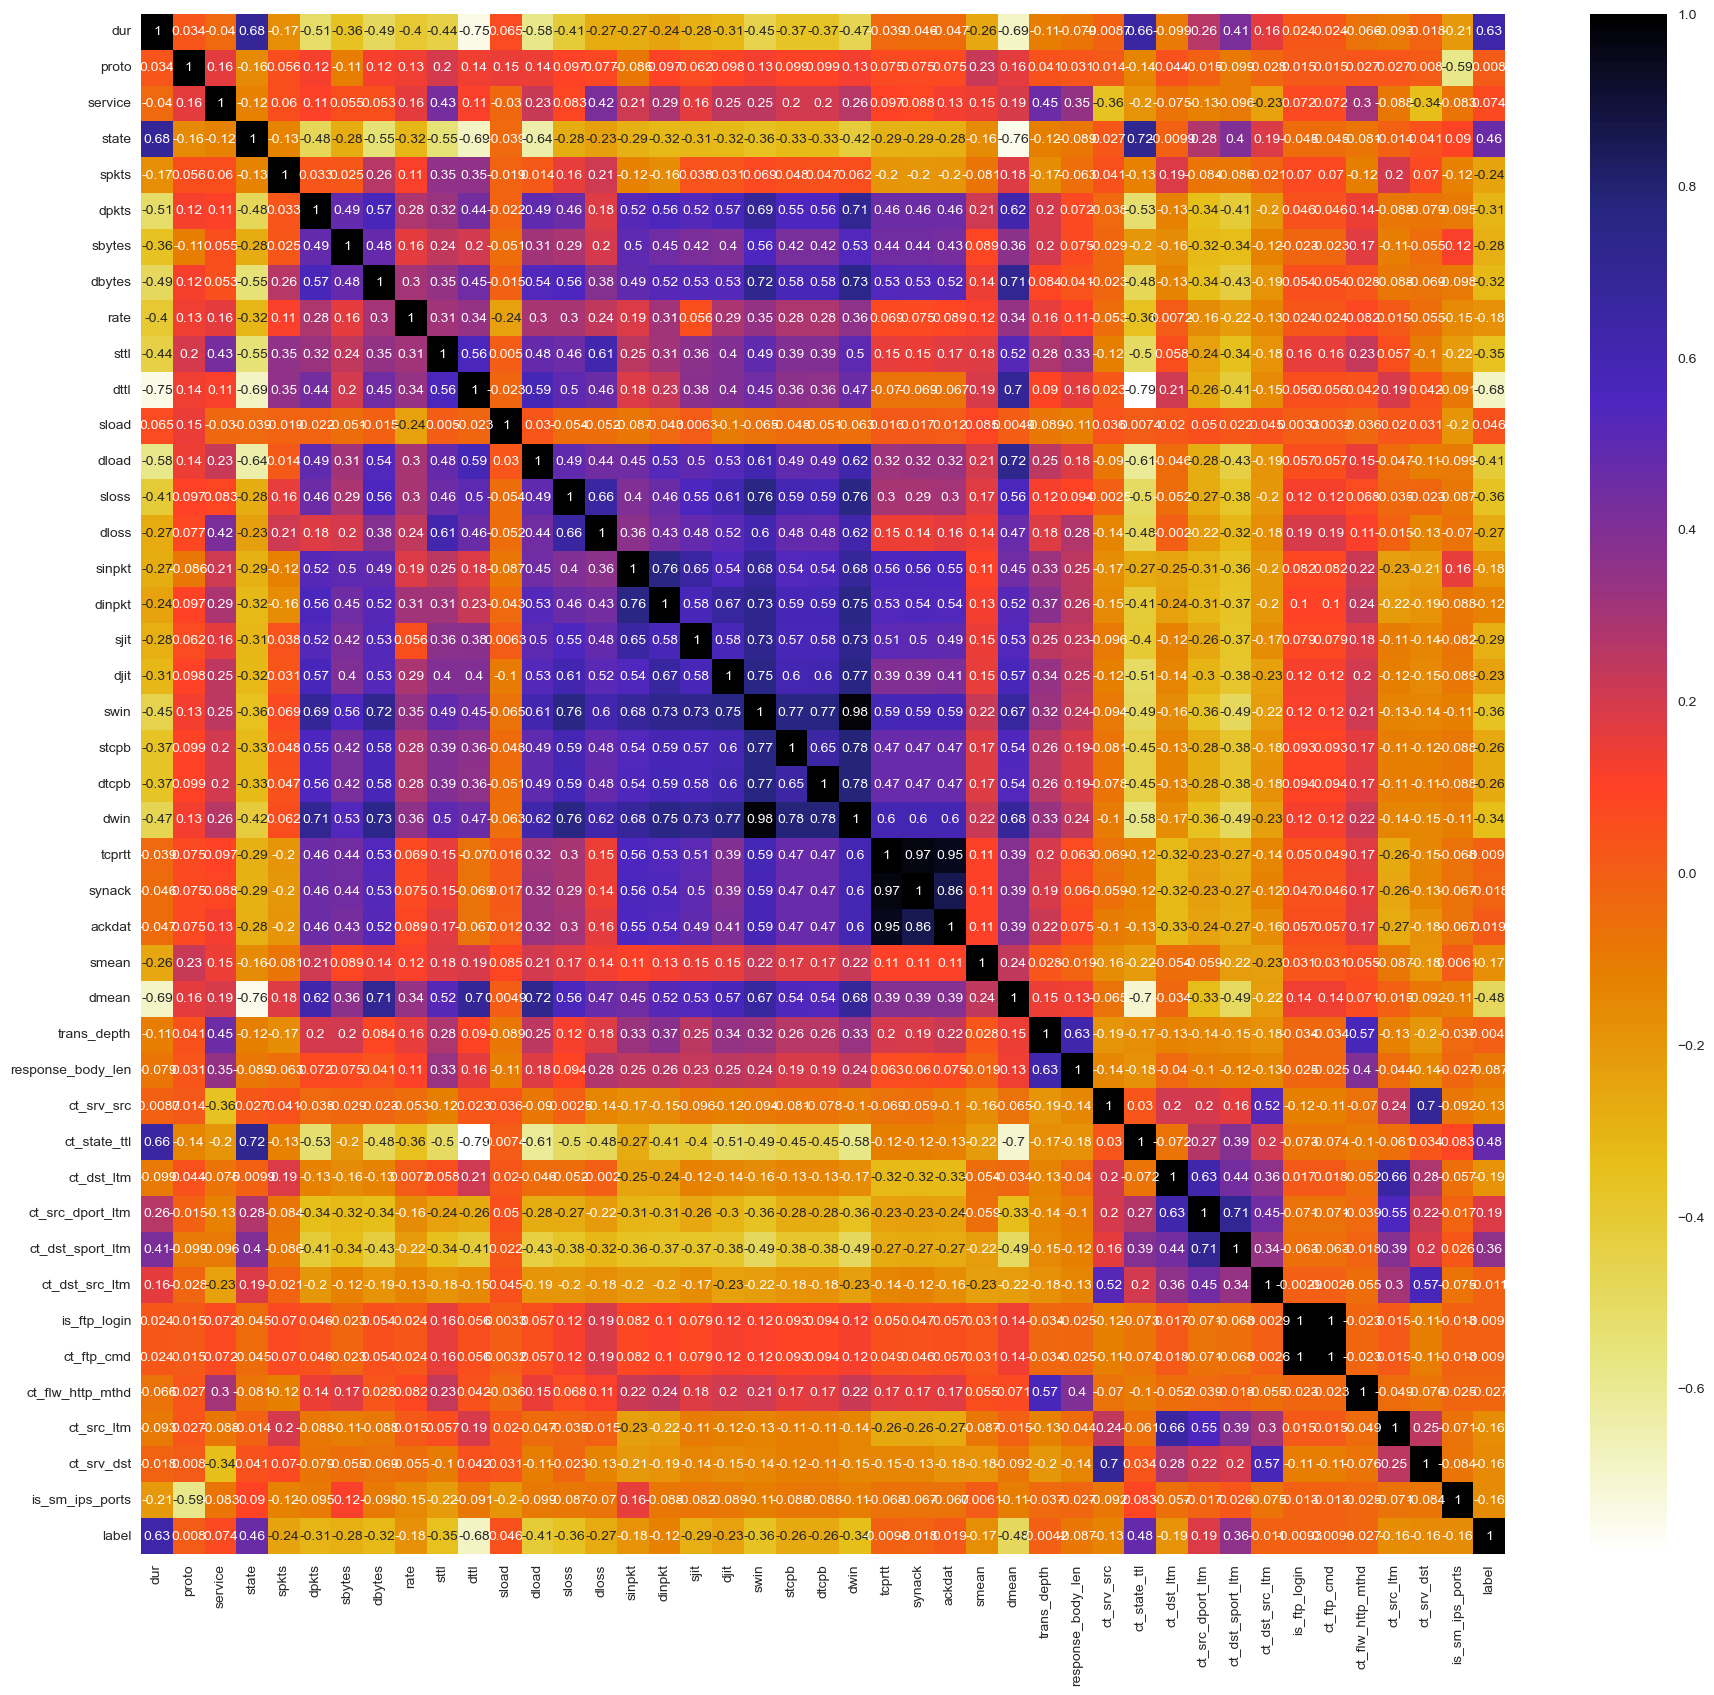

In [29]:
#Matrice de correlation
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(22,20))
cor = data_bin.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [30]:
#foction pour afficher les attributs les plus corrélée entre eux
columns = data_bin.columns.tolist()
corr = data_bin.corr()
correlated_vars = []
for i in range(len(columns) - 1):
    for j in range(i+1, len(columns)):
        if corr[columns[i]][columns[j]] > 0.96:
            print(columns[i], columns[j], corr[columns[i]][columns[j]])
            correlated_vars.append(columns[j])

swin dwin 0.9804620375263537
tcprtt synack 0.9713314870830884
is_ftp_login ct_ftp_cmd 0.9988177393466395


In [31]:
data_bin['is_ftp_login'].corr(data_bin['label'])

-0.009314418681324441

In [32]:
data_bin['ct_ftp_cmd'].corr(data_bin['label'])

-0.009647780837210879

In [33]:
data_bin['swin'].corr(data_bin['label'])

-0.3649525014861346

In [34]:
data_bin['dwin'].corr(data_bin['label'])

-0.33926542334205056

In [35]:
data_bin['tcprtt'].corr(data_bin['label'])

-0.009779322868173545

In [36]:
data_bin['synack'].corr(data_bin['label'])

-0.01814992814179967

In [37]:
data_bin.drop('is_ftp_login',axis = 1,inplace = True)

In [38]:
data_bin.drop('dwin',axis = 1,inplace = True)

In [39]:
data_bin.drop('tcprtt',axis = 1,inplace = True)

In [40]:
data_bin.drop('proto',axis = 1,inplace = True)#less corelated with the target variable

# Splitting training and testing sets


In [41]:
X = data_bin.drop(columns=['label'])
feature_list = list(X.columns)
X = np.array(X)
y = data_bin['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [42]:
print("Training set:", len(X_train))
print("Testing set:", len(X_test))

Training set: 206138
Testing set: 51535


In [43]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Modeling 

### CNN

In [44]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import numpy as np


In [45]:
# Create a CNN model

model = models.Sequential([
    layers.Reshape((38, 1), input_shape=(38,)),  # Reshape for 1D convolution (update to match your feature count)
    layers.Conv1D(32, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification, so use sigmoid activation
])

In [46]:
import time
start_time = time.time()

dt_time = (time.time() - start_time)

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')
print("Execution time: %s" % dt_time)


Epoch 1/10
5154/5154 [==============================] - 30s 5ms/step - loss: 0.1666 - accuracy: 0.9211 - val_loss: 0.1560 - val_accuracy: 0.9250
Epoch 2/10
5154/5154 [==============================] - 25s 5ms/step - loss: 0.1432 - accuracy: 0.9311 - val_loss: 0.1412 - val_accuracy: 0.9295
Epoch 3/10
5154/5154 [==============================] - 25s 5ms/step - loss: 0.1380 - accuracy: 0.9329 - val_loss: 0.1394 - val_accuracy: 0.9307
Epoch 4/10
5154/5154 [==============================] - 25s 5ms/step - loss: 0.1345 - accuracy: 0.9341 - val_loss: 0.1355 - val_accuracy: 0.9323
Epoch 5/10
5154/5154 [==============================] - 25s 5ms/step - loss: 0.1320 - accuracy: 0.9358 - val_loss: 0.1340 - val_accuracy: 0.9327
Epoch 6/10
5154/5154 [==============================] - 977s 190ms/step - loss: 0.1300 - accuracy: 0.9360 - val_loss: 0.1341 - val_accuracy: 0.9322
Epoch 7/10
5154/5154 [==============================] - 26s 5ms/step - loss: 0.1281 - accuracy: 0.9371 - val_loss: 0.1354 - val

In [47]:
from sklearn.metrics import confusion_matrix

# Assuming you have your true labels (y_true)
# Generate predictions with your model
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)  # Round predictions to 0 or 1, assuming binary classification

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


from sklearn.metrics import classification_report
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))



1611/1611 [==============================] - 3s 2ms/step
Confusion Matrix:
[[16874  1721]
 [ 1570 31370]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     18595
           1       0.95      0.95      0.95     32940

    accuracy                           0.94     51535
   macro avg       0.93      0.93      0.93     51535
weighted avg       0.94      0.94      0.94     51535



## SVM

In [48]:
from sklearn import model_selection
from sklearn import metrics

In [49]:
def fit_algo(algo, x, y, cv):
    #Fit the model
    model = algo.fit(x, y)
    
    #Check its score
    acc = round(model.score(x, y) *100, 2)
    y_pred = model_selection.cross_val_predict(algo, x, y, cv=cv, n_jobs = -1)
    
    acc_cv = round(metrics.accuracy_score(y,y_pred)*100, 2)
    
    return y_pred, acc, acc_cv, model

In [50]:
from sklearn.svm import LinearSVC
start_time = time.time()

pred_now, acc_svc, acc_cv_svc, svc= fit_algo(LinearSVC()
                                        ,X,y,10)

svc_time = (time.time() - start_time)

print("Accuracy: %s" % acc_svc)
print("Accuracy of CV: %s" % acc_cv_svc)
print("Execution time: %s" % svc_time)

from sklearn.metrics import classification_report
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 72.22
Accuracy of CV: 71.06
Execution time: 624.7576396465302
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     18595
           1       0.95      0.95      0.95     32940

    accuracy                           0.94     51535
   macro avg       0.93      0.93      0.93     51535
weighted avg       0.94      0.94      0.94     51535



## DT

In [51]:
from sklearn.tree import DecisionTreeClassifier
start_time = time.time()
pred_now, acc_dt, acc_cv_dt, dt = fit_algo(DecisionTreeClassifier(random_state = 1)
                                        , X, y, 10)

dt_time = (time.time() - start_time)

print("Accuracy: %s" % acc_dt)
print("Accuracy of CV: %s" % acc_cv_dt)
print("Execution time: %s" % dt_time)

from sklearn.metrics import classification_report
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 99.74
Accuracy of CV: 91.22
Execution time: 29.5079185962677
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     18595
           1       0.95      0.95      0.95     32940

    accuracy                           0.94     51535
   macro avg       0.93      0.93      0.93     51535
weighted avg       0.94      0.94      0.94     51535



# test save the best model byuyiuig

## Testing 

In [52]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Supposons que vous ayez déjà chargé et prétraité vos données en tant que 'X' et 'y'

# Créez et ajustez le classificateur d'arbre de décision sur l'ensemble de données complet
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X, y)

# Définissez vos deux ensembles de nouvelles données en tant que tableaux numpy ou listes d'échantillons
new_data1 = np.array([[48960,0,4,35,456,5430,3307,58121,3,1,71953,47523,247,1,76464,107125,50433,30557,12,6760,33709,50576,44754,623,759,0,0,44,1,11,11,0,44,0,0,11,44,0]])
new_data2 = np.array([[74881,3,4,35,48,7587,7103,41049,3,1,72797,77549,247,321,110094,98850,76431,16193,12,15570,55523,47043,46163,860,890,0,0,22,1,0,0,0,22,0,0,0,22,0]])

# Effectuez des prédictions sur le premier ensemble de données
predictions1 = dt.predict(new_data1)

# Affichez le message pour le premier ensemble de données
print("Prédictions pour le premier ensemble de données :")
for prediction in predictions1:
    if prediction == 1:
        print("Attaque")
    else:
        print("Non attaque")

# Effectuez des prédictions sur le deuxième ensemble de données
predictions2 = dt.predict(new_data2)

# Affichez le message  pour le deuxième ensemble de données
print("Prédictions pour le deuxième ensemble de données :")
for prediction in predictions2:
    if prediction == 1:
        print("Attaque")
    else:
        print("Non attaque")


Prédictions pour le premier ensemble de données :
Attaque
Prédictions pour le deuxième ensemble de données :
Non attaque


In [53]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Supposons que vous ayez déjà chargé et prétraité vos données en tant que 'X' et 'y'

# Créez et ajustez le classificateur d'arbre de décision sur l'ensemble de données complet
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X, y)

# Définissez vos deux ensembles de nouvelles données en tant que tableaux numpy ou listes d'échantillons
new_data1 = np.array([[1061,0,5,13,0,241,0,7275,3,0,48,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,52,2,11,11,11,55,0,0,11,52,0]])


# Effectuez des prédictions sur le premier ensemble de données
predictions1 = dt.predict(new_data1)

# Affichez le message pour le premier ensemble de données
print("Prédiction pour l'ensemble de donnée :")
for prediction in predictions1:
    if prediction == 1:
        print("Attaque")
    else:
        print("Non attaque")



Prédiction pour l'ensemble de donnée :
Non attaque


In [54]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Supposons que vous ayez déjà chargé et prétraité vos données en tant que 'X' et 'y'

# Créez et ajustez le classificateur d'arbre de décision sur l'ensemble de données complet
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X, y)

# Définissez vos deux ensembles de nouvelles données en tant que tableaux numpy ou listes d'échantillons
new_data1 = np.array([[106171,0,5,131,0,2471,0,70275,3,0,46748,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,52,2,11,11,11,55,0,0,11,52,0]])


# Effectuez des prédictions sur le premier ensemble de données
predictions1 = dt.predict(new_data1)

# Affichez le message pour le premier ensemble de données
print("Prédiction pour l'ensemble de donnée :")
for prediction in predictions1:
    if prediction == 1:
        print("Attaque")
    else:
        print("Non attaque")



Prédiction pour l'ensemble de donnée :
Attaque
